###### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1.Which variables are significant in predicting the demand for shared bikes.
2.How well those variables describe the bike demands

### Reading and Understanding the data

In [146]:

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [147]:
import numpy as np
import pandas as pd

bikes=pd.read_csv("day.csv") #read the dataset
bikes.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [148]:
#Inspect various elements of bikes dataset
bikes.shape #find total rows and column

(730, 16)

In [149]:
bikes.info() #Datatypes and missing values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [150]:
bikes.describe() #statistical summary of numerial variables

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Visualisation

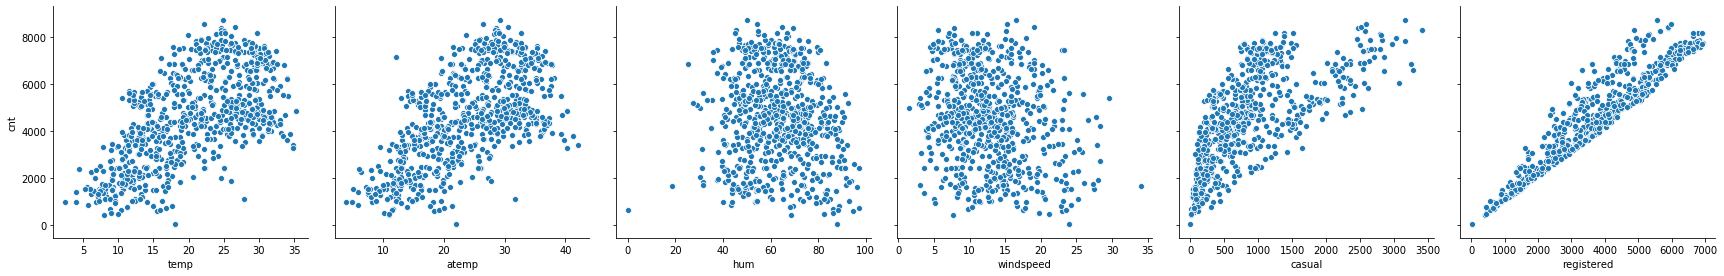

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualising numerical variables
#casual and registered have a good association with cnt but its something whih is already known to client also
#temp and atemp has a good association with dependent variable cnt
sns.pairplot(bikes, x_vars=[ 'temp','atemp','hum','windspeed','casual', 'registered'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()


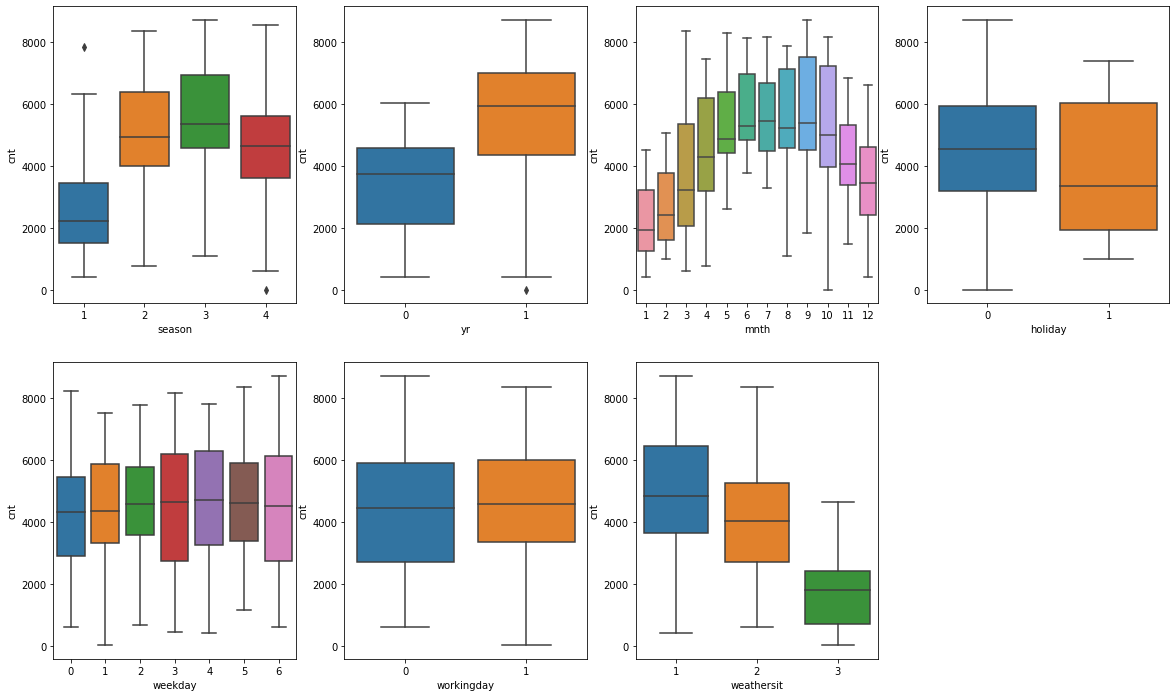

In [152]:
#visualising categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bikes)#mean of season 2 and 3 are higher in compariosn to 1 and 4
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=bikes)#2019 seems to be more beneficial that 2018
plt.subplot(2,4,3)

sns.boxplot(x='mnth',y='cnt',data=bikes)# 5 to 9 months means middle of year business grows
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=bikes)#IN holidays the average goes down in comparison to non - holidays
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=bikes)#Mean of the weekdays are almost similar
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=bikes)#Mean is almost similar for working and non working days but 25th percentile is 
                                                # low for non working day
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=bikes)#CLear and mist env has more cnt
plt.show()

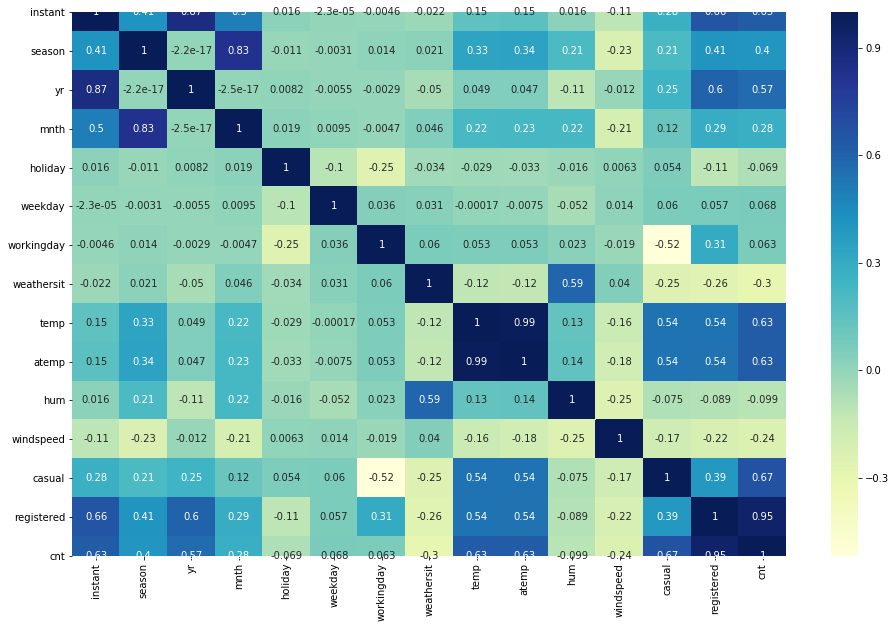

In [141]:
#correlation between features using heatmap
plt.figure(figsize = (16,10))
sns.heatmap(bikes.corr(), cmap="YlGnBu", annot = True) #correlation between features using heatmap
plt.show()

### Data Preparation

In [154]:
#Drop columns -Instant,dteday,casula and registered
bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikes.head()

KeyError: "['instant' 'dteday' 'casual' 'registered'] not found in axis"

In [155]:
#Dummy variables for categorical features-first changing the datatype to object
#Change the datatype of categorical features to object datatype
bikes=bikes.astype({'season':'object','mnth':'object','weekday':'object','weathersit':'object'})
bikes.dtypes




In [156]:
#Dummy variables for categorical feature-season
status=pd.get_dummies(bikes['season'],drop_first = True,prefix='season') #If categorical vaiable has p levels then dummy will have p-1 cols
#add the result to originla dataframe
bikes=pd.concat([bikes,status],axis=1)
bikes.drop(['season'],axis=1,inplace=True)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [157]:
#Dummy variables for categorical feature-mnth
status=pd.get_dummies(bikes['mnth'],drop_first = True,prefix='mnth') 
bikes=pd.concat([bikes,status],axis=1)
bikes.drop(['mnth'],axis=1,inplace=True)
bikes.head()



,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [158]:
#Dummy variables for categorical feature-weekday
status=pd.get_dummies(bikes['weekday'],drop_first = True,prefix='weekday') 
bikes=pd.concat([bikes,status],axis=1)
bikes.drop(['weekday'],axis=1,inplace=True)
bikes.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0


In [159]:
#Dummy variables for categorical feature-weathersit
status=pd.get_dummies(bikes['weathersit'],drop_first = True,prefix='weathersit') 
bikes=pd.concat([bikes,status],axis=1)
bikes.drop(['weathersit'],axis=1,inplace=True)
bikes.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [160]:
bikes.shape #view the total cols after dropping cols and adding dummy variables

(730, 30)

In [161]:
#splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [162]:
#Scaling the numerical features
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
#Apply scaler() to all continuous variables/features
num_vars=['temp','atemp','hum','windspeed','cnt']
bikes_train[num_vars]=scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [163]:

bikes_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
yr              510 non-null int64
holiday         510 non-null int64
workingday      510 non-null int64
temp            510 non-null float64
atemp           510 non-null float64
hum             510 non-null float64
windspeed       510 non-null float64
cnt             510 non-null float64
season_2        510 non-null uint8
season_3        510 non-null uint8
season_4        510 non-null uint8
mnth_2          510 non-null uint8
mnth_3          510 non-null uint8
mnth_4          510 non-null uint8
mnth_5          510 non-null uint8
mnth_6          510 non-null uint8
mnth_7          510 non-null uint8
mnth_8          510 non-null uint8
mnth_9          510 non-null uint8
mnth_10         510 non-null uint8
mnth_11         510 non-null uint8
mnth_12         510 non-null uint8
weekday_1       510 non-null uint8
weekday_2       510 non-null uint8
weekday_3       510 non-null uint8
weekday_4

In [164]:
#Dividing the train dataset into X & y
y_train=bikes_train.pop('cnt')
X_train=bikes_train

### Data Modeling

In [165]:
#Implement Recursive Feature Elimination(RFE)
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [166]:
#Running RFE with output number of variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [167]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [168]:
col = X_train.columns[rfe.support_]
col               #display the true cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [169]:
X_train.columns[~rfe.support_] #display the false cols

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [171]:
#Building model using statsmodel, for the detailed statistics
#Create X_train dataframe using RFE selected features/variables
X_train_rfe=X_train[col]

In [172]:
#Add a constant model as statsmodel fits a line that passes through origin
import statsmodels.api as sm 
X_train_rfe = sm.add_constant(X_train_rfe)

In [174]:
#Run the linear model and print the statistical summary of the model      -MODEL 1
lr=sm.OLS(y_train,X_train_rfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.89e-191
Time:                        20:28:13   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791      0.000       0.139       0.251
yr               0.2301      0.008     28.776      0.000       0.214       0.246
holiday         -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday       0.0446      0.012      3.877      0.000       0.022       0.067
temp             0.4960      0.034     14.803      0.000       0.430       0.562
hum             -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed       -0.1824      0.025     -7.200      0.000      -0.232      -0.133
season_2         0.1175      0.015      7.985      0.000       0.089       0.146
season_3         0.0295      0.022      1.346      0.179      -0.014       0.073
season_4         0.1430      0.013     10.688      0.000       0.117       0.169
mnth_8           0.0475      0.017      2.745      0.006       0.013       0.081
mnth_9           0.1178      0.017      6.895      0.000       0.084       0.151
mnth_10          0.0442      0.017      2.565      0.011       0.010       0.078
weekday_6        0.0533      0.015      3.676      0.000       0.025       0.082
weathersit_2    -0.0592      0.010     -5.702      0.000      -0.080      -0.039
weathersit_3    -0.2523      0.026     -9.655      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
#Rebuild the model WITHOUT season_3 which has high p-value of 0.179  -----MODEL 2
X_train_new=X_train_rfe.drop(['season_3'],axis=1)

In [179]:
#add a constant variable
X_train_lm=sm.add_constant(X_train_new)

In [181]:
#Run the Linear Model
lr=sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.24e-192
Time:                        20:59:18   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770      0.000       0.138       0.251
yr               0.2292      0.008     28.743      0.000       0.213       0.245
holiday         -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday       0.0444      0.012      3.850      0.000       0.022       0.067
temp             0.5301      0.022     24.136      0.000       0.487       0.573
hum             -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed       -0.1857      0.025     -7.359      0.000      -0.235      -0.136
season_2         0.1039      0.011      9.680      0.000       0.083       0.125
season_4         0.1348      0.012     11.316      0.000       0.111       0.158
mnth_8           0.0560      0.016      3.478      0.001       0.024       0.088
mnth_9           0.1255      0.016      7.783      0.000       0.094       0.157
mnth_10          0.0411      0.017      2.403      0.017       0.007       0.075
weekday_6        0.0529      0.015      3.647      0.000       0.024       0.081
weathersit_2    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_3    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [183]:
X_train_new=X_train_new.drop(['const'],axis=1)

In [184]:
# Calculate the VIFs for the new model==MODEL 2
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_4,2.27
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.83
10,mnth_10,1.62


In [185]:
#Rebuild the model WITHOUT hum which has highest VIF value of 16.59 -- MODEL 3
X_train_new = X_train_new.drop(['hum'],axis=1)

In [186]:
#add a constant variable
X_train_lm=sm.add_constant(X_train_new)

In [187]:
#Run the Linear Model
lr=sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          6.16e-189
Time:                        23:09:43   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961      0.000       0.057       0.132
yr               0.2329      0.008     28.799      0.000       0.217       0.249
holiday         -0.0543      0.027     -1.982      0.048      -0.108      -0.000
workingday       0.0475      0.012      4.045      0.000       0.024       0.070
temp             0.5099      0.022     23.236      0.000       0.467       0.553
windspeed       -0.1532      0.025     -6.203      0.000      -0.202      -0.105
season_2         0.1008      0.011      9.226      0.000       0.079       0.122
season_4         0.1267      0.012     10.544      0.000       0.103       0.150
mnth_8           0.0542      0.016      3.305      0.001       0.022       0.086
mnth_9           0.1189      0.016      7.259      0.000       0.087       0.151
mnth_10          0.0371      0.017      2.132      0.033       0.003       0.071
weekday_6        0.0580      0.015      3.931      0.000       0.029       0.087
weathersit_2    -0.0854      0.009     -9.839      0.000      -0.102      -0.068
weathersit_3    -0.2942      0.025    -12.009      0.000      -0.342      -0.246
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.937
Skew:                          -0.704   Prob(JB):                     2.30e-39
Kurtosis:                       5.528   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [191]:
X_train_new=X_train_lm.drop(['const'],axis=1)

In [192]:
# Calculate the VIFs for the new model==MODEL 3
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_4,2.02
5,season_2,1.82
10,weekday_6,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weathersit_2,1.54


In [193]:
#Rebuild the model WITHOUT temp which has highest VIF value of 6.38 -- MODEL 4
X_train_new = X_train_new.drop(['temp'],axis=1)

In [194]:
#add a constant variable
X_train_lm=sm.add_constant(X_train_new)

In [195]:
#Run the Linear Model
lr=sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     83.87
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.91e-111
Time:                        23:16:07   Log-Likelihood:                 320.78
No. Observations:                 510   AIC:                            -615.6
Df Residuals:                     497   BIC:                            -560.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3649      0.022     16.747      0.000       0.322       0.408
yr               0.2501      0.012     21.507      0.000       0.227       0.273
holiday         -0.0785      0.040     -1.986      0.048      -0.156      -0.001
workingday       0.0490      0.017      2.893      0.004       0.016       0.082
windspeed       -0.2503      0.035     -7.122      0.000      -0.319      -0.181
season_2         0.1671      0.015     10.968      0.000       0.137       0.197
season_4         0.0813      0.017      4.750      0.000       0.048       0.115
mnth_8           0.2213      0.021     10.386      0.000       0.179       0.263
mnth_9           0.2432      0.022     10.887      0.000       0.199       0.287
mnth_10          0.1145      0.025      4.638      0.000       0.066       0.163
weekday_6        0.0503      0.021      2.363      0.019       0.008       0.092
weathersit_2    -0.1158      0.012     -9.353      0.000      -0.140      -0.091
weathersit_3    -0.3074      0.035     -8.693      0.000      -0.377      -0.238
==============================================================================
Omnibus:                        5.841   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                8.065
Skew:                          -0.016   Prob(JB):                       0.0177
Kurtosis:                       3.615   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [197]:
X_train_new=X_train_lm.drop(['const'],axis=1)

In [198]:
# Calculate the VIFs for the new model==MODEL 4
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.53
3,windspeed,3.41
5,season_4,2.01
0,yr,1.91
9,weekday_6,1.61
4,season_2,1.60
8,mnth_10,1.57
10,weathersit_2,1.54
6,mnth_8,1.24
7,mnth_9,1.16


In [200]:
#Since R2 and Adj R2 goes down drastically so will retain temp but since holiday has high p-Value in comparison to others
#so rebuild model WITHOUT holiday ---------MODEL5
X_train_rfe.head()
X_train_new=X_train_rfe.drop(['const','holiday','hum','season_3'],axis=1)

In [202]:
X_train_new.head()

,yr,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
653,1,1,0.509887,0.300794,0,1,0,0,1,0,0,0
576,1,1,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0,1,1,0


In [203]:
#add a constant variable
X_train_lm=sm.add_constant(X_train_new)

In [204]:
#Run the Linear Model
lr=sm.OLS(y_train,X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          2.86e-189
Time:                        23:44:54   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0856      0.019      4.610      0.000       0.049       0.122
yr               0.2331      0.008     28.734      0.000       0.217       0.249
workingday       0.0555      0.011      5.031      0.000       0.034       0.077
temp             0.5116      0.022     23.259      0.000       0.468       0.555
windspeed       -0.1542      0.025     -6.226      0.000      -0.203      -0.106
season_2         0.1015      0.011      9.269      0.000       0.080       0.123
season_4         0.1260      0.012     10.461      0.000       0.102       0.150
mnth_8           0.0546      0.016      3.318      0.001       0.022       0.087
mnth_9           0.1172      0.016      7.146      0.000       0.085       0.149
mnth_10          0.0384      0.017      2.198      0.028       0.004       0.073
weekday_6        0.0662      0.014      4.656      0.000       0.038       0.094
weathersit_2    -0.0849      0.009     -9.764      0.000      -0.102      -0.068
weathersit_3    -0.2932      0.025    -11.936      0.000      -0.342      -0.245
==============================================================================
Omnibus:                       74.837   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.872
Skew:                          -0.735   Prob(JB):                     4.83e-43
Kurtosis:                       5.647   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [206]:
X_train_new=X_train_lm.drop(['const'],axis=1)

In [207]:
# Calculate the VIFs for the new model==MODEL 5
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#We have decided to keep thetemp feature eventhough VIF is a bit higher as we have notie else R2 and ADJ R2 goes down sharply

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,season_4,1.99
4,season_2,1.82
9,weekday_6,1.70
8,mnth_10,1.61
6,mnth_8,1.59
10,weathersit_2,1.54


In [212]:
#RESIDUAL ANALYSIS: check if the error terms are also normally distributed
y_train_pred = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

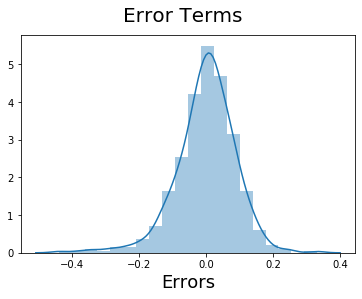

In [213]:
res=y_train - y_train_pred
#plot histogram of error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         #x-axis label

In [214]:
#MAKING PREDICTIONS
#Applying scaling on test set
#Apply scaler() to all continuous variables/features
num_vars=['temp','atemp','hum','windspeed','cnt']
bikes_test[num_vars]=scaler.transform(bikes_test[num_vars])
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [215]:
#Dividing the test dataset into X and y
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [216]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new=X_test[X_train_new.columns]
X_test_new.head()

,yr,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
184,0,0,0.831783,0.084219,0,0,0,0,0,0,1,0
535,1,1,0.901354,0.153728,1,0,0,0,0,0,0,0
299,0,1,0.511964,0.334206,0,1,0,0,1,0,1,0
221,0,1,0.881625,0.339570,0,0,1,0,0,0,0,0
152,0,1,0.817246,0.537414,1,0,0,0,0,0,0,0


In [217]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [218]:
# Making predictions
y_test_pred = lr.predict(X_test_new)

Text(0, 0.5, 'y_pred')

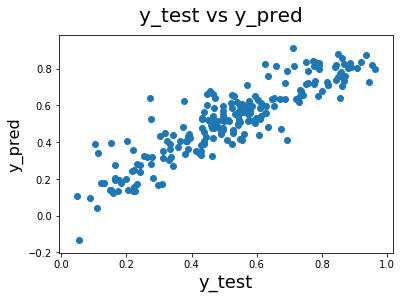

In [219]:
#Model Evaluation
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test_pred vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [220]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8024444386146302